In [5]:
import numpy as np
import pandas as pd
from scipy.stats import *

import seaborn as sns
import matplotlib.pyplot as plt

import torch
import pyro

from ipywidgets import *

In [2]:
%matplotlib inline
plt.style.use("default")
sns.set_style("whitegrid")

# Lecture 2

## Grid approximation
### Uniform prior

[Text(0.5, 23.52222222222222, 'p'),
 Text(45.347222222222214, 0.5, 'posterior'),
 (0.0, 1.0)]

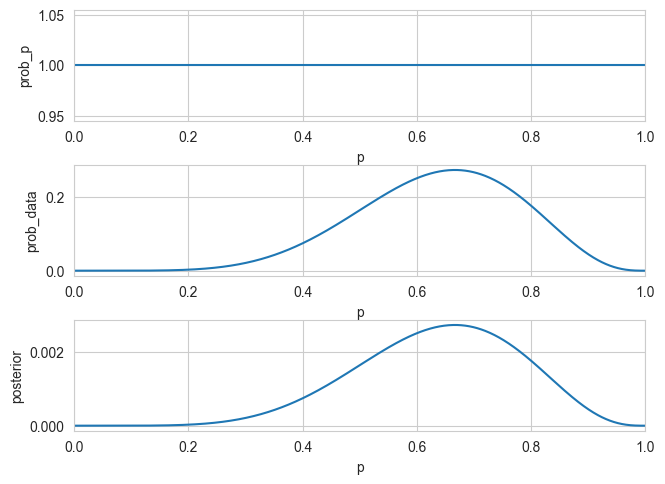

In [72]:
p_grid = np.linspace(0, 1, 1000)
prob_p = np.ones(1000)
prob_data = binom.pmf(6, 9, p_grid)
posterior = prob_data * prob_p
posterior = posterior / np.sum(posterior)

fig, axs = plt.subplots(3)
fig.tight_layout()
sns.lineplot(ax=axs[0], x=p_grid, y=prob_p).set(xlabel="p", ylabel="prob_p", xlim=[0, 1])
sns.lineplot(ax=axs[1], x=p_grid, y=prob_data).set(xlabel="p", ylabel="prob_data", xlim=[0, 1])
sns.lineplot(ax=axs[2], x=p_grid, y=posterior).set(xlabel="p", ylabel="posterior", xlim=[0, 1])

### Beta prior

[Text(0.5, 23.52222222222222, 'p'),
 Text(45.347222222222214, 0.5, 'posterior'),
 (0.0, 1.0)]

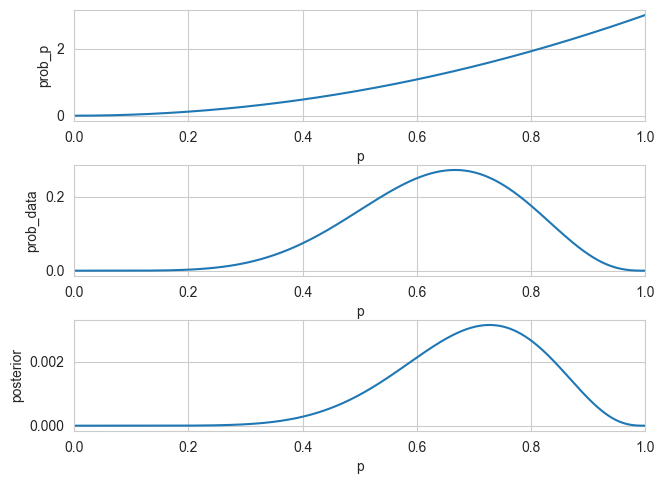

In [71]:
p_grid = np.linspace(0, 1, 1000)
prob_p = beta.pdf(p_grid, 3, 1)
prob_data = binom.pmf(6, 9, p_grid)
posterior = prob_data * prob_p
posterior = posterior / np.sum(posterior)

fig, axs = plt.subplots(3, constrained_layout=True)
sns.lineplot(ax=axs[0], x=p_grid, y=prob_p).set(xlabel="p", ylabel="prob_p", xlim=[0, 1])
sns.lineplot(ax=axs[1], x=p_grid, y=prob_data).set(xlabel="p", ylabel="prob_data", xlim=[0, 1])
sns.lineplot(ax=axs[2], x=p_grid, y=posterior).set(xlabel="p", ylabel="posterior", xlim=[0, 1])

### Interactive

In [24]:
# set up UI
alpha_slider = IntSlider(3, min=0, max=25, description="alpha")
beta_slider = IntSlider(1, min=0, max=25, description="beta")
n_water_slider = IntSlider(6, min=0, max=25, description="n_water")
n_draws_slider = IntSlider(9, min=0, max=25, description="n_draws")
ui = HBox([alpha_slider, beta_slider, n_water_slider, n_draws_slider])

# configure plotting
def plot(alpha, bet, n_draws, n_water):
    p_grid = np.linspace(0, 1, 1000)
    prob_p = beta.pdf(p_grid, alpha, bet)
    prob_data = binom.pmf(n_water, n_draws, p_grid)
    posterior = prob_data * prob_p
    posterior = posterior / np.sum(posterior)

    fig, axs = plt.subplots(3, constrained_layout=True)
    sns.lineplot(ax=axs[0], x=p_grid, y=prob_p).set(title="Prior distribution", xlabel="proportion water", ylabel="density", xlim=[0, 1])
    sns.lineplot(ax=axs[1], x=p_grid, y=prob_data).set(title="Likelihood distribution", xlabel="proportion water", ylabel="density", xlim=[0, 1])
    sns.lineplot(ax=axs[2], x=p_grid, y=posterior).set(title="Posterior distribution", xlabel="proportion water", ylabel="density", xlim=[0, 1])

out = interactive_output(plot, {"alpha": alpha_slider, "bet": beta_slider, "n_water": n_water_slider, "n_draws": n_draws_slider})
display(ui, out)

Output()

## Posterior predictive distribution

[Text(0.5, 0, 'p'), Text(0, 0.5, 'density'), (0.0, 1.0)]

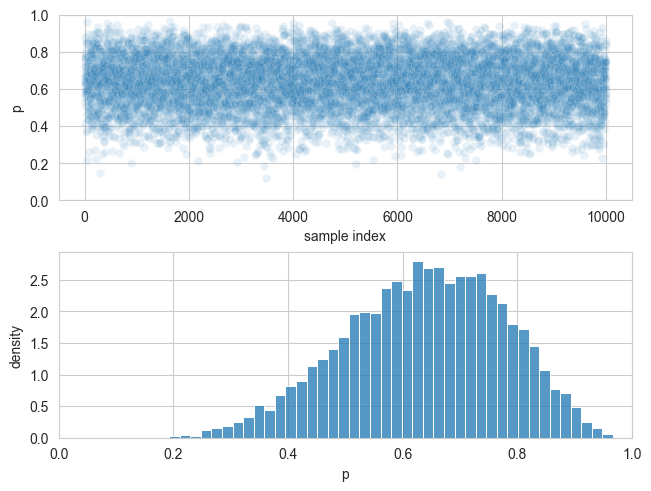

In [91]:
samples = np.random.choice(p_grid, size=10000, p=posterior, replace=True)

fig, axs = plt.subplots(2, constrained_layout=True)
sns.scatterplot(ax=axs[0], x=np.arange(10000), y=samples, alpha=.1).set(xlabel="sample index", ylabel="p", ylim=[0, 1])
sns.histplot(ax=axs[1], x=samples, stat="density").set(xlabel="p", ylabel="density", xlim=[0, 1])

[Text(0.5, 1.0, 'Posterior predictive'),
 Text(0.5, 0, 'number of water samples'),
 Text(0, 0.5, 'density'),
 (0.0, 9.0)]

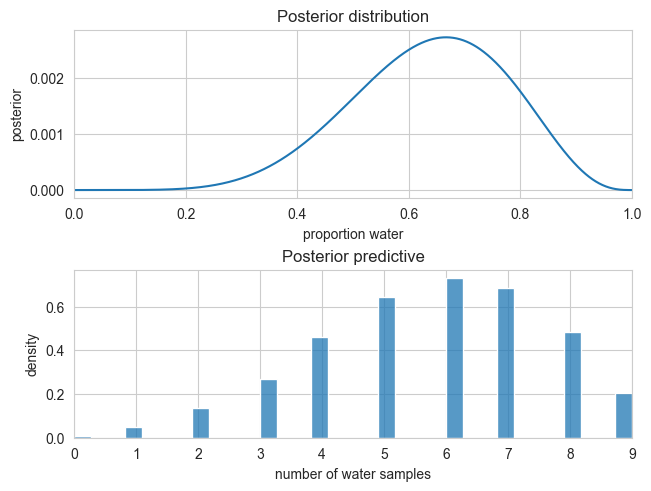

In [87]:
samples = np.random.choice(p_grid, size=10000, p=posterior, replace=True)
w = binom.rvs(n=9, p=samples, size=10000)

fig, axs = plt.subplots(2, constrained_layout=True)
sns.lineplot(ax=axs[0], x=p_grid, y=posterior).set(title="Posterior distribution", xlabel="proportion water", ylabel="posterior", xlim=[0, 1])
sns.histplot(ax=axs[1], x=w, stat="density").set(title="Posterior predictive", xlabel="number of water samples", ylabel="density", xlim=[0, 9])